Цель: Исследовать, как экономические показатели влияют на демографические (рождаемость, смертность, миграция)

In [9]:
import pandas as pd
import zipfile
import os
import numpy as np

In [484]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
from io import StringIO

# Загрузка данных


Социально-экономические показатели регионов России//Росстат; обработка «Если быть точным», 2023. Условия использования: Creative Commons BY 4.0. URL: https://tochno.st/datasets/regions_collection

In [89]:
#Загружаем данные из папки
folder_path = r'C:\Users\Admin\work\socdem\data\data_regions_collection_102_v25062024_csv'
# пустой список для хранения DataFrame
dataframes = []

# Перебераем все файлы в  папке
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # объединяем в полный путь
        file_path = os.path.join(folder_path, filename)        
        # Чтение CSV-файла и добавление его в список
        df = pd.read_csv(file_path, sep = ';')
        dataframes.append(df)

In [91]:
# Объединяем все датафреймы в один
combined_df = pd.concat(dataframes, ignore_index=True)

# Сохраняем объединенный DataFrame в новый CSV-файл
combined_df.to_csv(r'C:\Users\Admin\work\socdem\data\combined_file.csv')

print("Файлы успешно объединены!")

Файлы успешно объединены!


In [77]:
#combined_df = pd.read_csv(r'C:\Users\Admin\work\socdem\data\combined_file.csv')

In [78]:
combined_df.head(2)

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,Население,Y4170101000000,Численность населения,CD,Российская Федерация,страна,0,0,2000,146303.6,"оценка на конец года, тысяч человек",Данные за 2011‒2021 гг. пересчитаны с учетом и...,Регионы России. Социально-экономические показа...
1,Население,Y4170101000000,Численность населения,CD,Российская Федерация,страна,0,0,2001,145649.3,"оценка на конец года, тысяч человек",Данные за 2011‒2021 гг. пересчитаны с учетом и...,Регионы России. Социально-экономические показа...


In [85]:
combined_df.describe()

,object_oktmo,object_okato,year,indicator_value
count,3.866957e+06,3.866957e+06,3.866957e+06,3.866957e+06
mean,4.752735e+07,4.749592e+07,2.013110e+03,-6.372149e+06
std,3.151216e+07,3.151169e+07,6.612121e+00,2.348558e+07
min,0.000000e+00,0.000000e+00,2.000000e+03,-1.000000e+08
25%,1.800000e+07,1.800000e+07,2.008000e+03,1.360000e+01
50%,4.700000e+07,4.700000e+07,2.014000e+03,9.510000e+01
75%,7.600000e+07,7.600000e+07,2.019000e+03,9.030000e+02
max,9.900000e+07,9.900000e+07,2.023000e+03,1.819700e+09


In [115]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3866957 entries, 0 to 3866956
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   section          object 
 1   indicator_code   object 
 2   indicator_name   object 
 3   subsection       object 
 4   object_name      object 
 5   object_level     object 
 6   object_oktmo     int64  
 7   object_okato     int64  
 8   year             int64  
 9   indicator_value  float64
 10  indicator_unit   object 
 11  comment          object 
 12  source           object 
dtypes: float64(1), int64(3), object(9)
memory usage: 383.5+ MB


Разделы показателей

In [119]:
combined_df_new.section.unique()

array(['Население', 'Труд', 'Уровень жизни населения', 'Образование',
       'Здравоохранение', 'Культура, отдых и туризм',
       'Земельные ресурсы и охрана окружающей природной среды',
       'Валовой региональный продукт', 'Основные фонды', 'Инвестиции',
       'Предприятия и организации', 'Промышленное производство',
       'Сельское, лесное хозяйство, рыболовство и рыбоводство',
       'Строительство', 'Торговля и услуги населению', 'Транспорт',
       'Информационные и коммуникационные технологии',
       'Наука и инновации', 'Финансы', 'Цены и тарифы',
       'Внешняя торговля',
       'Производство и импорт важнейших видов продукции для строительной деятельности',
       'Ввод в действие зданий и производственных мощностей',
       'Жилищное и социально-культурное строительство',
       'Уровень и динамика цен в сфере инвестиционной деятельности',
       'Строительные организации',
       'Основные фонды и инвестиции в основной капитал',
       'Численность населения', 'Рождае

Показатели

In [121]:
combined_df.indicator_name.unique()

array(['Численность населения', 'Среднегодовая численность населения',
       'Удельный вес городского населения в общей численности населения',
       'Удельный вес сельского населения в общей численности населения',
       'Соотношение мужчин и женщин',
       'Возрастной состав населения: Население моложе трудоспособного возраста',
       'Возрастной состав населения: Население в трудоспособном возрасте',
       'Возрастной состав населения: Население старше трудоспособного возраста',
       'Коэффициенты демографической нагрузки: Всего',
       'Коэффициенты демографической нагрузки: Моложе трудоспособного возраста',
       'Коэффициенты демографической нагрузки: Старше трудоспособного возраста',
       'Темпы прироста численности населения',
       'Общие коэффициенты рождаемости', 'Общие коэффициенты смертности',
       'Смертность населения в трудоспособном возрасте',
       'Смертность населения (без показателя смертности от внешних причин)',
       'Коэффициенты младенческой с

Года наблюдений

In [113]:
combined_df.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023], dtype=int64)

# Ищем корреляцию

Отбираем данные по регионам и показателям 

In [155]:
object_level_list = ['регион']

In [159]:
filtered_df = combined_df[combined_df['object_level'].isin(object_level_list)]

In [147]:
indicator_name_list = ['Численность населения','Возрастной состав населения: Население в трудоспособном возрасте','Темпы прироста численности населения','Общие коэффициенты рождаемости', 'Общие коэффициенты смертности',
       'Смертность населения в трудоспособном возрасте', 'Коэффициенты миграционного прироста на 10 000 человек населения','Численность населения в трудоспособном возрасте',
       'Распределение числа прибывших по направлениям передвижения: В пределах региона',
       'Распределение числа прибывших по направлениям передвижения: Из других регионов',
       'Распределение числа прибывших по направлениям передвижения: Из-за пределов России',
       'Распределение числа выбывших по направлениям передвижения: В пределах региона',
       'Распределение числа выбывших по направлениям передвижения: В другие регионы России',
       'Распределение числа выбывших по направлениям передвижения: За пределы России', 'Уровень занятости населения в трудоспособном возрасте', 'Реальные денежные доходы: Реальные доходы населения',
       'Реальные денежные доходы: Реальная начисленная заработная плата работников организаций','Медианный среднедушевой денежный доход населения',  'Общая площадь жилых помещений, приходящаяся в среднем на одного жителя','Число организаций', 'Оборот организаций',
       'Сальдированный финансовый результат (прибыль минус убыток) деятельности организаций',  'Удельный вес убыточных организаций', 'Ввод в действие жилых домов: На 1000 человек населения','Оборот розничной торговли на душу населения', 'Ввод в действие автомобильных дорог с твердым покрытием',  'Инвестиции в основной капитал, направленные на развитие здравоохранения, по субъектам Российской Федерации',
       'Ввод в действие мощностей больничных организаций по субъектам Российской Федерации',
       'Ввод в действие мощностей больничных организаций в сельской местности по субъектам Российской Федерации',
       'Ввод в действие мощностей амбулаторно-поликлинических организаций по субъектам Российской Федерации',
       'Ввод в действие мощностей амбулаторно-поликлинических организаций в сельской местности по субъектам Российской Федерации', 'Сальдированный финансовый результат (прибыль минус убыток) деятельности малых предприятий по субъектам Российской Федерации',
       'Сальдированный финансовый результат (прибыль минус убыток) деятельности микропредприятий по субъектам Российской Федерации',
       'Сальдированный финансовый результат (прибыль минус убыток) деятельности средних предприятий по субъектам Российской Федерации', 'Валовой региональный продукт',
       'Валовой региональный продукт на душу населения']

In [398]:
# Фильтрация DataFrame
filtered_df = filtered_df[filtered_df['indicator_name'].isin(indicator_name_list)]

In [169]:
filtered_df.describe()

,object_oktmo,object_okato,year,indicator_value
count,1.788240e+05,1.788240e+05,178824.000000,1.788240e+05
mean,5.247164e+07,5.243646e+07,2012.089898,-4.860266e+06
std,2.893168e+07,2.893718e+07,6.716775,2.073247e+07
min,1.000000e+06,1.000000e+06,2000.000000,-1.000000e+08
25%,2.700000e+07,2.700000e+07,2006.000000,1.690000e+01
50%,5.400000e+07,5.400000e+07,2013.000000,6.070000e+01
75%,7.800000e+07,7.800000e+07,2018.000000,6.930000e+02
max,9.900000e+07,9.900000e+07,2023.000000,2.447116e+07


In [424]:
# Условие для фильтрации строк
condition = filtered_df['object_name'].str.contains(' без ')
filtered_df = filtered_df[~condition]


condition = (filtered_df['indicator_name'] == 'Валовой региональный продукт') & (filtered_df['indicator_value'] < 0)
filtered_df = filtered_df[~condition]
condition = (filtered_df['indicator_name'] == 'Валовой региональный продукт на душу населения') & (filtered_df['indicator_value'] < 0)
filtered_df = filtered_df[~condition]

In [422]:
filtered_df.loc[(filtered_df.indicator_name == 'Валовой региональный продукт на душу населения') & (filtered_df.indicator_value <0)]

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source


In [426]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174487 entries, 46 to 3803503
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   section          174487 non-null  object 
 1   indicator_code   174487 non-null  object 
 2   indicator_name   174487 non-null  object 
 3   subsection       174487 non-null  object 
 4   object_name      174487 non-null  object 
 5   object_level     174487 non-null  object 
 6   object_oktmo     174487 non-null  int64  
 7   object_okato     174487 non-null  int64  
 8   year             174487 non-null  int64  
 9   indicator_value  174487 non-null  float64
 10  indicator_unit   174487 non-null  object 
 11  comment          174487 non-null  object 
 12  source           174487 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 18.6+ MB


In [404]:
filtered_df.head(2)

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
46,Население,Y4170101000000,Численность населения,CD,Белгородская область,регион,14000000,14000000,2000,1507.0,"оценка на конец года, тысяч человек",Данные за 2011‒2021 гг. пересчитаны с учетом и...,Регионы России. Социально-экономические показа...
47,Население,Y4170101000000,Численность населения,CD,Белгородская область,регион,14000000,14000000,2001,1508.1,"оценка на конец года, тысяч человек",Данные за 2011‒2021 гг. пересчитаны с учетом и...,Регионы России. Социально-экономические показа...


In [450]:
# Создаем сводную таблицу с добавлением региона
pivot_df = filtered_df.pivot_table(
    index=['year', 'object_name'],  # Добавляем object_name в индекс
    columns='indicator_name',
    values='indicator_value',
    aggfunc='max'  # Используем среднее значение
)
pivot_df

indicator_name                        Валовой региональный продукт  \
year object_name                                                     
2000 Алтайский край                                        46736.8   
     Амурская область                                      26315.2   
     Архангельская область                                 61806.9   
     Астраханская область                                  28115.7   
     Белгородская область                                  42074.5   
...                                                            ...   
2023 Чеченская Республика                                      NaN   
     Чувашская Республика                                      NaN   
     Чукотский автономный округ                                NaN   
     Ямало-Ненецкий автономный округ                           NaN   
     Ярославская область                                       NaN   

indicator_name                        Валовой региональный продукт на душу населения  \
year object_name                                                                       
2000 Алтайский край                                                          17660.5   
     Амурская область                                                        28317.2   
     Архангельская область                                                   44797.4   
     Астраханская область                                                    27815.3   
     Белгородская область                                                    27969.5   
...                                                                              ...   
2023 Чеченская Республика                                                        NaN   
     Чувашская Республика                                                        NaN   
     Чукотский автономный округ                                                  NaN   
     Ямало-Ненецкий автономный округ                                             NaN   
     Ярославская область                                                         NaN   

indicator_name                        Ввод в действие автомобильных дорог с твердым покрытием  \
year object_name                                                                                
2000 Алтайский край                                                               184.6         
     Амурская область                                                              43.3         
     Архангельская область                                                         70.8         
     Астраханская область                                                          76.0         
     Белгородская область                                                          32.8         
...                                                                                 ...         
2023 Чеченская Республика                                                           NaN         
     Чувашская Республика                                                           NaN         
     Чукотский автономный округ                                                     NaN         
     Ямало-Ненецкий автономный округ                                                NaN         
     Ярославская область                                                            NaN         

indicator_name                        Ввод в действие жилых домов: На 1000 человек населения  \
year object_name                                                                               
2000 Алтайский край                                                          156.816808        
     Амурская область                                                        130.743570        
     Архангельская область                                                    56.389070        
     Астраханская область                                                    479.719034        
     Белгородская область                                                    467.792329        
...       

нужно определить, что делать с пропущенными и ошибочными значениями. Некоторые показатели считают не каждый год, смотрим пропуски

In [452]:
pivot_df_index = pivot_df.reset_index()

In [454]:
indicator_name_list_data = ['year','Валовой региональный продукт', 'Ввод в действие жилых домов: На 1000 человек населения', 'Возрастной состав населения: Население в трудоспособном возрасте', 'Коэффициенты миграционного прироста на 10 000 человек населения', 'Оборот розничной торговли на душу населения','Общая площадь жилых помещений, приходящаяся в среднем на одного жителя','Общие коэффициенты рождаемости','Общие коэффициенты смертности', 'Распределение числа выбывших по направлениям передвижения: В другие регионы России', 'Распределение числа выбывших по направлениям передвижения: В пределах региона','Распределение числа выбывших по направлениям передвижения: За пределы России','Распределение числа прибывших по направлениям передвижения: В пределах региона','Распределение числа прибывших по направлениям передвижения: Из других регионов','Распределение числа прибывших по направлениям передвижения: Из-за пределов России','Реальные денежные доходы: Реальная начисленная заработная плата работников организаций','Реальные денежные доходы: Реальные доходы населения', 'Сальдированный финансовый результат (прибыль минус убыток) деятельности организаций', 'Смертность населения в трудоспособном возрасте', 'Темпы прироста численности населения', ' Удельный вес убыточных организаций', 'Уровень занятости населения в трудоспособном возрасте', 'Численность населения', 'Число организаций'   ]

In [456]:
filtered_pivot =pivot_df_index [['year', 'object_name','Валовой региональный продукт', 'Ввод в действие жилых домов: На 1000 человек населения', 'Возрастной состав населения: Население в трудоспособном возрасте', 'Коэффициенты миграционного прироста на 10 000 человек населения', 'Оборот розничной торговли на душу населения','Общая площадь жилых помещений, приходящаяся в среднем на одного жителя','Общие коэффициенты рождаемости','Общие коэффициенты смертности', 'Распределение числа выбывших по направлениям передвижения: В другие регионы России', 'Распределение числа выбывших по направлениям передвижения: В пределах региона','Распределение числа выбывших по направлениям передвижения: За пределы России','Распределение числа прибывших по направлениям передвижения: В пределах региона','Распределение числа прибывших по направлениям передвижения: Из других регионов','Распределение числа прибывших по направлениям передвижения: Из-за пределов России','Реальные денежные доходы: Реальная начисленная заработная плата работников организаций','Реальные денежные доходы: Реальные доходы населения', 'Сальдированный финансовый результат (прибыль минус убыток) деятельности организаций', 'Смертность населения в трудоспособном возрасте', 'Темпы прироста численности населения', 'Удельный вес убыточных организаций', 'Уровень занятости населения в трудоспособном возрасте', 'Численность населения', 'Число организаций'   ]]

In [458]:
filtered_pivot.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023], dtype=int64)

In [460]:
filtered_pivot = filtered_pivot[filtered_pivot['year']<2023]

In [464]:
filtered_pivot = filtered_pivot.dropna()

In [466]:
filtered_pivot.to_csv(r'C:\Users\Admin\work\socdem\data\filtered_pivot.csv')

In [468]:
filtered_pivot

indicator_name,year,object_name,Валовой региональный продукт,Ввод в действие жилых домов: На 1000 человек населения,Возрастной состав населения: Население в трудоспособном возрасте,Коэффициенты миграционного прироста на 10 000 человек населения,Оборот розничной торговли на душу населения,"Общая площадь жилых помещений, приходящаяся в среднем на одного жителя",Общие коэффициенты рождаемости,Общие коэффициенты смертности,...,Распределение числа прибывших по направлениям передвижения: Из-за пределов России,Реальные денежные доходы: Реальная начисленная заработная плата работников организаций,Реальные денежные доходы: Реальные доходы населения,Сальдированный финансовый результат (прибыль минус убыток) деятельности организаций,Смертность населения в трудоспособном возрасте,Темпы прироста численности населения,Удельный вес убыточных организаций,Уровень занятости населения в трудоспособном возрасте,Численность населения,Число организаций
0,2000,Алтайский край,46736.8,156.816808,60.7,10.0,9220.984734,18.400000,9.3,14.3,...,18.7,113.6,109.4,2293.0,620.8,-0.80,42.3,67.353487,2641.1,45822.0
1,2000,Амурская область,26315.2,130.743570,62.8,-91.0,12303.228236,18.600000,10.2,14.6,...,4.0,116.4,110.6,-79.0,834.8,-1.30,53.1,68.322352,923.0,14033.0
2,2000,Архангельская область,61806.9,56.389070,61.9,-78.0,11844.848880,21.500000,8.8,16.3,...,6.0,121.0,120.1,7305.0,943.0,-1.40,47.7,70.904162,1369.1,20026.0
3,2000,Астраханская область,28115.7,479.719034,60.0,13.0,10875.797388,17.500000,9.9,14.3,...,9.8,125.1,122.2,5397.0,714.5,-0.40,32.4,68.892228,1009.3,15998.0
4,2000,Белгородская область,42074.5,467.792329,57.8,109.0,11820.178821,21.000000,8.0,15.5,...,24.6,117.0,107.0,4840.0,581.5,0.10,39.1,73.665981,1507.0,24112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,2021,Чеченская Республика,268068.5,680.000000,57.5,-17.0,141300.000000,20.357732,19.4,5.8,...,7.8,98.8,102.1,-8983.0,195.7,1.20,27.4,62.384360,1514.6,9511.0
1866,2021,Чувашская Республика,392957.9,596.000000,56.1,-13.0,166150.000000,29.597515,9.2,17.0,...,8.0,105.3,103.9,13998.0,617.3,-0.91,27.2,77.127229,1183.9,20124.0
1867,2021,Чукотский автономный округ,136152.4,61.000000,65.0,76.0,225671.000000,23.964029,10.1,10.8,...,14.6,104.6,107.3,56300.0,890.0,0.68,34.8,86.581654,47.9,1100.0
1868,2021,Ямало-Ненецкий автономный округ,4161529.6,314.000000,64.5,-19.0,293712.000000,20.527424,12.6,6.3,...,15.8,99.6,103.0,1466987.0,419.1,0.49,34.4,82.202666,511.2,8252.0


In [470]:
filtered_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1837 entries, 0 to 1869
Data columns (total 25 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   year                                                                                    1837 non-null   int64  
 1   object_name                                                                             1837 non-null   object 
 2   Валовой региональный продукт                                                            1837 non-null   float64
 3   Ввод в действие жилых домов: На 1000 человек населения                                  1837 non-null   float64
 4   Возрастной состав населения: Население в трудоспособном возрасте                        1837 non-null   float64
 5   Коэффициенты миграционного прироста на 10 000 человек населения           

In [472]:
filtered_pivot.describe()

indicator_name,year,Валовой региональный продукт,Ввод в действие жилых домов: На 1000 человек населения,Возрастной состав населения: Население в трудоспособном возрасте,Коэффициенты миграционного прироста на 10 000 человек населения,Оборот розничной торговли на душу населения,"Общая площадь жилых помещений, приходящаяся в среднем на одного жителя",Общие коэффициенты рождаемости,Общие коэффициенты смертности,Распределение числа выбывших по направлениям передвижения: В другие регионы России,...,Распределение числа прибывших по направлениям передвижения: Из-за пределов России,Реальные денежные доходы: Реальная начисленная заработная плата работников организаций,Реальные денежные доходы: Реальные доходы населения,Сальдированный финансовый результат (прибыль минус убыток) деятельности организаций,Смертность населения в трудоспособном возрасте,Темпы прироста численности населения,Удельный вес убыточных организаций,Уровень занятости населения в трудоспособном возрасте,Численность населения,Число организаций
count,1837.000000,1.837000e+03,1837.000000,1837.000000,1.837000e+03,1837.000000,1.837000e+03,1837.000000,1837.000000,1.837000e+03,...,1.837000e+03,1.837000e+03,1.837000e+03,1.837000e+03,1.837000e+03,1.837000e+03,1.837000e+03,1.837000e+03,1837.000000,1.837000e+03
mean,2010.584105,6.165754e+05,378.597687,59.985629,-1.088824e+05,108007.070480,-4.231650e+04,11.709254,14.295591,-8.463300e+04,...,-8.466850e+04,-1.934456e+05,-4.474848e+05,6.040227e+04,-1.081955e+05,-1.088735e+05,-4.230405e+04,-1.511406e+05,1760.340501,5.313510e+04
std,6.347776,1.553306e+06,230.940130,3.691867,3.298694e+06,77738.322784,1.814684e+06,3.114407,3.584724,2.565653e+06,...,2.565652e+06,4.176787e+06,6.087024e+06,1.868658e+06,3.298717e+06,3.298695e+06,1.814685e+06,3.763676e+06,1731.082590,1.176738e+05
min,2000.000000,2.618500e+03,5.012252,50.200000,-1.000000e+08,2967.950089,-7.777778e+07,6.700000,3.000000,-7.777778e+07,...,-7.777778e+07,-1.000000e+08,-1.000000e+08,-7.777778e+07,-1.000000e+08,-1.000000e+08,-7.777778e+07,-1.000000e+08,40.900000,6.260000e+02
25%,2005.000000,8.223080e+04,214.000000,57.300000,-4.600000e+01,36472.000000,2.040000e+01,9.600000,12.600000,3.760000e+01,...,5.200000e+00,1.021000e+02,9.980000e+01,1.672000e+03,5.528000e+02,-9.300000e-01,2.940000e+01,6.939129e+01,752.600000,1.527000e+04
50%,2011.000000,2.258871e+05,340.000000,59.900000,-1.100000e+01,98243.000000,2.290000e+01,11.100000,14.500000,4.370000e+01,...,9.100000e+00,1.059000e+02,1.040000e+02,1.273000e+04,6.564000e+02,-4.900000e-01,3.450000e+01,7.343000e+01,1210.300000,2.669600e+04
75%,2016.000000,5.692973e+05,496.000000,62.300000,2.300000e+01,164303.000000,2.570000e+01,13.100000,16.400000,5.210000e+01,...,1.410000e+01,1.115000e+02,1.104000e+02,5.479800e+04,8.004000e+02,1.000000e-01,4.090000e+01,7.668091e+01,2430.700000,5.084000e+04
max,2021.000000,2.447116e+07,1780.000000,72.700000,2.523000e+03,477554.000000,3.516362e+01,29.900000,24.900000,9.390000e+01,...,4.540000e+01,1.521000e+02,1.460000e+02,1.063289e+07,1.436800e+03,9.630000e+00,7.030000e+01,8.732589e+01,13015.100000,1.281657e+06


In [476]:
# Создаем копию DataFrame, чтобы избежать предупреждения
pivot_no_region = filtered_pivot.drop(['object_name', 'year'], axis=1)




In [480]:
correlation_matrix = pivot_no_region.corr()

In [482]:
correlation_matrix

indicator_name,Валовой региональный продукт,Ввод в действие жилых домов: На 1000 человек населения,Возрастной состав населения: Население в трудоспособном возрасте,Коэффициенты миграционного прироста на 10 000 человек населения,Оборот розничной торговли на душу населения,"Общая площадь жилых помещений, приходящаяся в среднем на одного жителя",Общие коэффициенты рождаемости,Общие коэффициенты смертности,Распределение числа выбывших по направлениям передвижения: В другие регионы России,Распределение числа выбывших по направлениям передвижения: В пределах региона,...,Распределение числа прибывших по направлениям передвижения: Из-за пределов России,Реальные денежные доходы: Реальная начисленная заработная плата работников организаций,Реальные денежные доходы: Реальные доходы населения,Сальдированный финансовый результат (прибыль минус убыток) деятельности организаций,Смертность населения в трудоспособном возрасте,Темпы прироста численности населения,Удельный вес убыточных организаций,Уровень занятости населения в трудоспособном возрасте,Численность населения,Число организаций
indicator_name,,,,,,,,,,,,,,,,,,,,,
Валовой региональный продукт,1.000000,0.229822,-0.046254,0.010780,0.537927,0.008922,-0.002329,-0.198538,0.010775,-0.204439,...,0.010774,0.014506,0.025164,0.218699,0.010756,0.010774,0.008921,0.013746,0.683880,0.682933
Ввод в действие жилых домов: На 1000 человек населения,0.229822,1.000000,-0.311770,-0.015204,0.539584,0.034733,-0.001293,-0.110061,-0.015215,0.006241,...,-0.015214,0.004066,0.061022,0.066560,-0.015241,-0.015215,0.034730,0.003412,0.243674,0.106786
Возрастной состав населения: Население в трудоспособном возрасте,-0.046254,-0.311770,1.000000,0.029833,-0.430116,0.010658,0.120989,-0.173700,0.029838,-0.080730,...,0.029836,0.043540,0.047999,0.013238,0.029859,0.029836,0.010659,0.031289,-0.007345,0.062632
Коэффициенты миграционного прироста на 10 000 человек населения,0.010780,-0.015204,0.029833,1.000000,0.009889,-0.000770,-0.011039,-0.004645,1.000000,0.376723,...,1.000000,0.789097,0.540083,0.001508,1.000000,1.000000,-0.000771,0.876085,0.011702,0.012158
Оборот розничной торговли на душу населения,0.537927,0.539584,-0.430116,0.009889,1.000000,0.029360,0.001143,-0.211860,0.009887,-0.050022,...,0.009887,0.008947,0.051921,0.123370,0.009856,0.009886,0.029357,0.022821,0.272170,0.258822
"Общая площадь жилых помещений, приходящаяся в среднем на одного жителя",0.008922,0.034733,0.010658,-0.000770,0.029360,1.000000,-0.100373,0.059884,-0.000770,-0.002045,...,-0.000770,-0.001082,0.296570,0.972399,-0.000768,-0.000770,1.000000,0.481482,0.008200,0.009097
Общие коэффициенты рождаемости,-0.002329,-0.001293,0.120989,-0.011039,0.001143,-0.100373,1.000000,-0.659197,-0.011035,0.062986,...,-0.011036,-0.017448,-0.225254,-0.099938,-0.011049,-0.011035,-0.100372,-0.058068,-0.142754,-0.098078
Общие коэффициенты смертности,-0.198538,-0.110061,-0.173700,-0.004645,-0.211860,0.059884,-0.659197,1.000000,-0.004648,0.050196,...,-0.004646,-0.008221,0.101669,0.022179,-0.004605,-0.004647,0.059883,0.024801,-0.025651,-0.073143
Распределение числа выбывших по направлениям передвижения: В другие регионы России,0.010775,-0.015215,0.029838,1.000000,0.009887,-0.000770,-0.011035,-0.004648,1.000000,0.376725,...,1.000000,0.789100,0.540085,0.001507,1.000000,1.000000,-0.000771,0.876085,0.011692,0.012151


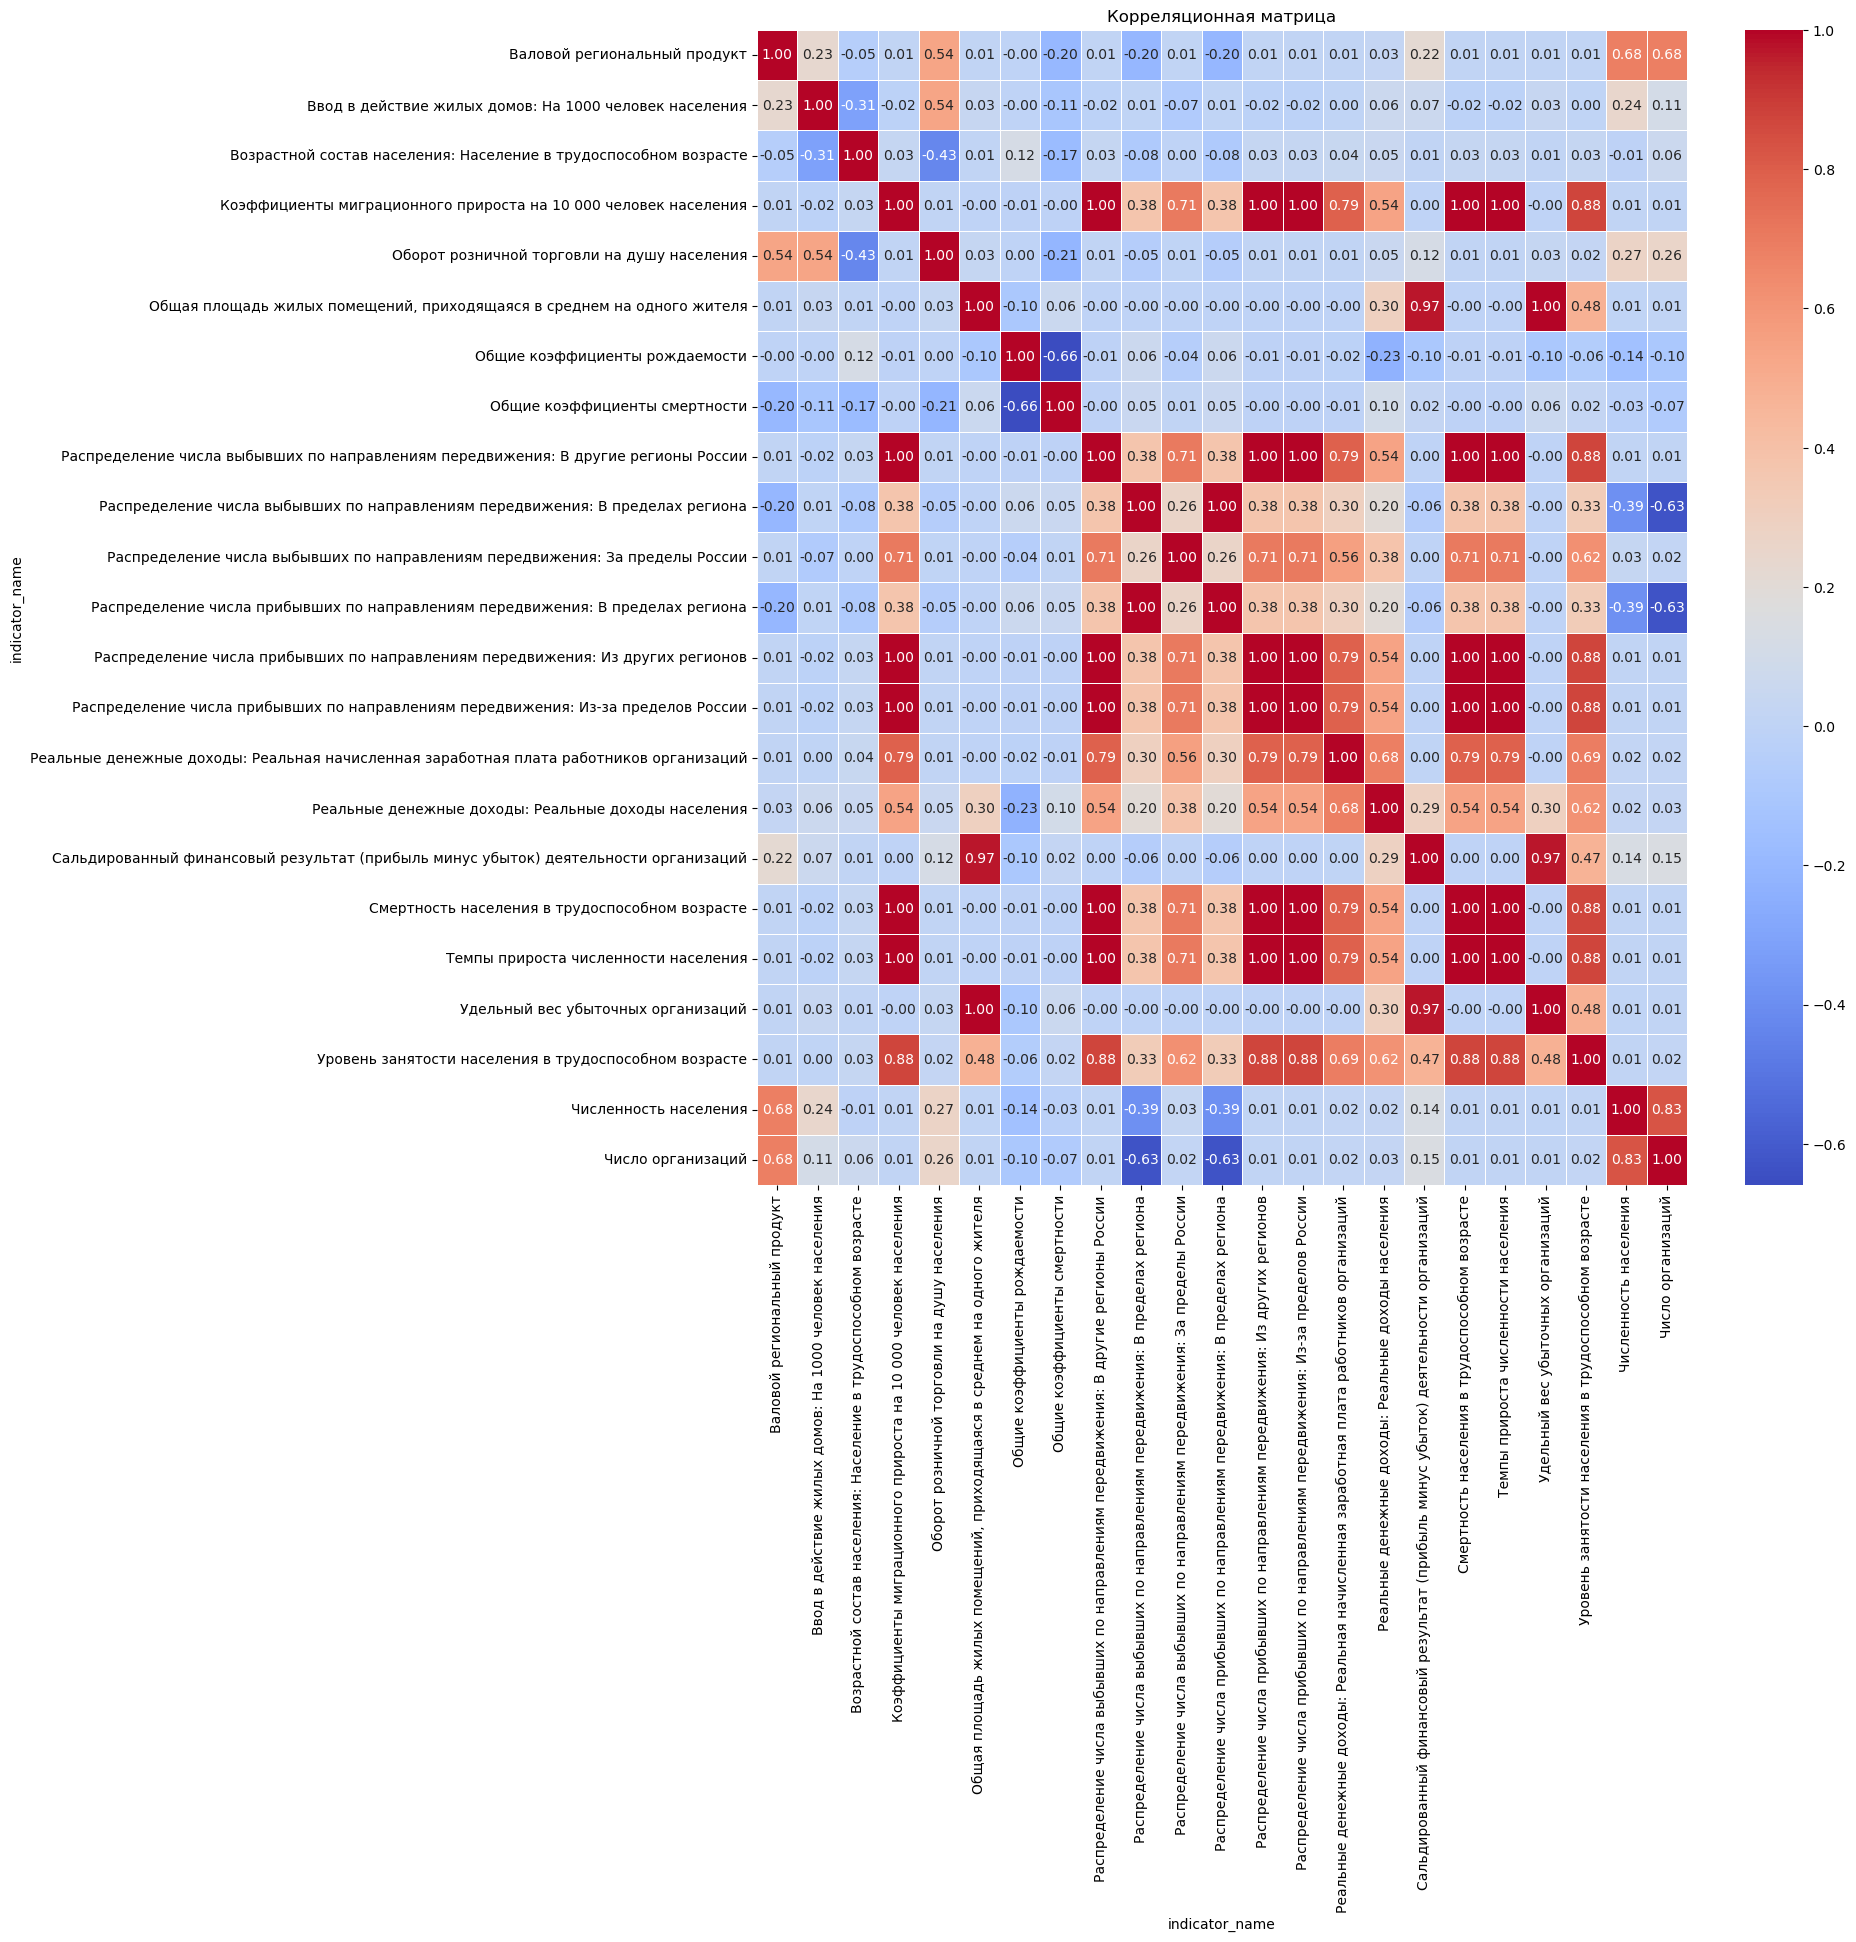

In [494]:
# Создаем тепловую карту
plt.figure(figsize=(15, 15))  # Размер графика
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Добавляем заголовок
plt.title("Корреляционная матрица")

# Показываем график

# Сохраняем тепловую карту в файл
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>